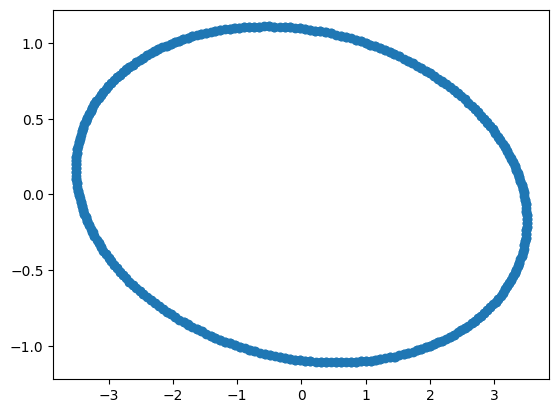

In [25]:
import matplotlib.pyplot as plt
import numpy as np

x = 1
p = 1
length = 1
focus = 0.1
#drift_c = np.array([1, length], [0, 1])
#focus_c = np.array([1, 0], [-focus, 1])
#arr1 = np.array([x_init][p_init])
xList = [x]
pList = [p]
for i in range(500):
    x = x + length*p
    p = p
    x = x
    p = p - focus*x
    xList.append(x)
    pList.append(p)

plt.scatter(xList, pList)
plt.show()
    



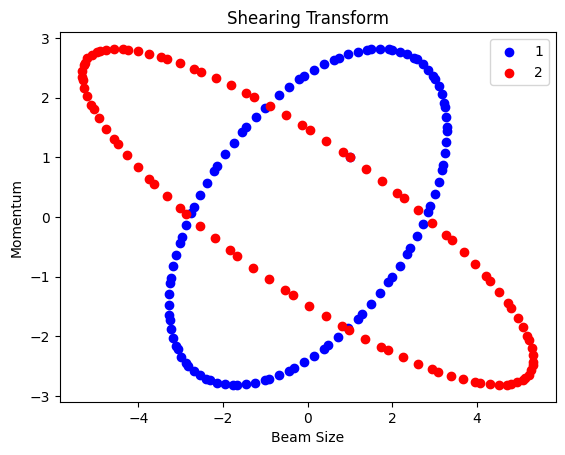

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = 1
p = 1
length = 1
focus = 0.9

xList1 = [x]
pList1 = [p]
xList2 = [x]
pList2 = [p]
for i in range(100):
    #red
    x = x + length*p
    p = p
    x = x
    p = p + focus*x
    xList1.append(x)
    pList1.append(p)

    #blue
    x = x + length*p
    p = p
    x = x
    p = p - focus*x
    xList2.append(x)
    pList2.append(p)

#plt.scatter(xList, pList)

plt.scatter(xList1, pList1, label='1', color='blue')
plt.scatter(xList2, pList2, label='2', color='red')
plt.xlabel('Beam Size')
plt.ylabel('Momentum')
plt.title('Shearing Transform')
plt.legend()
plt.show()

#shearing transform
#plot in two separate plots, on same graph put both plots in diff colors -- which ellipse is which, horizontal axis = beam size,
#one magnet beam is larger, other magnet beam is smaller, play with focusing strength - where does it have or not have ellipses\
#photo lattice
# look at plots where only first two elements plotted, or full ellipse w/ 2 plots of only first 2 points, esp when close to point of instability
#typical tune for photo cell is 90 degrees
#ratio of beam size to momentum spread changing
#phase advance change, tilt change

#how large of f to not have ellipses

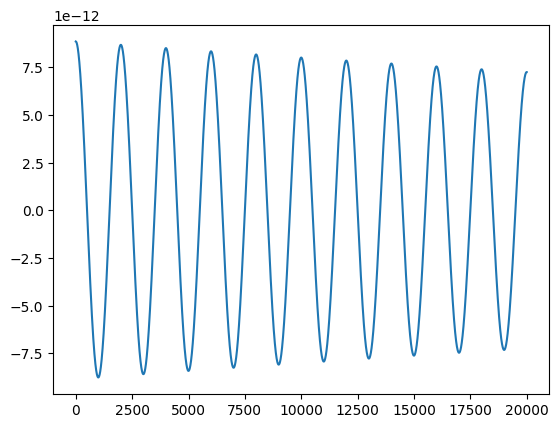

In [56]:
import matplotlib.pyplot as plt
import math

f = 0.5
epsilonNaught = 8.854187817 * 10**-12
alpha = .01 #2pi*f/Q, Q = energy lost/cycle
deltaT = 0.001

EList = []
tList = []

for t in range(20000):
    temp = epsilonNaught * math.cos(2*math.pi*f*t*deltaT) * (math.exp(-1*alpha*t*deltaT))
    EList.append(temp)
    tList.append(t)


plt.plot(tList, EList)
plt.show()

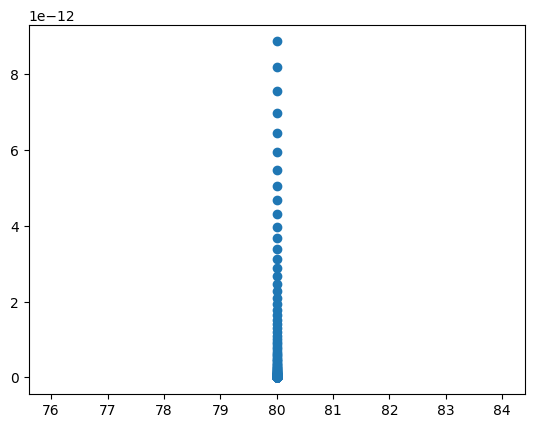

In [37]:
import matplotlib.pyplot as plt
import math

f = 0.5
epsilonNaught = 8.854187817 * 10**-12
t = 80

EList = []
alphaList = []

for alpha in range(200):
    temp = epsilonNaught * math.cos(2*math.pi*f*t)* (math.exp(-0.001*alpha*t))
    EList.append(temp)
    alphaList.append(t)


plt.scatter(alphaList, EList)
plt.show()

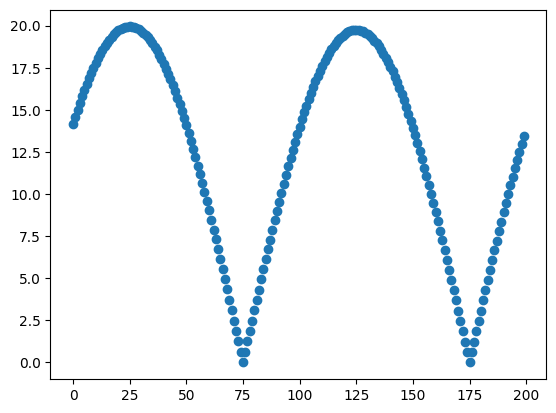

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import math

x = 1
p = 1
length = 1
focus = 0.5

E = 10
cB = 10

ang_init = np.array([0,0])
currAng = ang_init
v = 0.01

TVals = []
RVals = []
for i in range(200):
    T = 0.01*i
    alpha = 0.0001 #numbers around 1
    currAng[1] = currAng[1] + v


    num1 = math.exp(-alpha*T)
    dampingArr = np.array([[num1, 0],
                        [0, num1]])
    rotationArr = np.array([[math.cos(ang*T), math.sin(ang*T)], 
                            [-math.sin(ang*T), -math.cos(ang*T)]])
    M = np.matmul(dampingArr, rotationArr)

    currAng = np.matmul(M, currAng)

    #final = np.matmul(final, np.array([E, cB]))

    #print(final)
    r = math.sqrt(currAng[0]**2 + currAng[1]**2)
    TVals.append(T)
    RVals.append(r)
    #as T gets bigger, os does damping + phase change

#print(f'Matrix Product of arr2 and arr1 is:\n{final}')
#print(f'radius is:\n{r}')


plt.scatter(TVals, RVals)
plt.show()

